# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [11]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
df.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mod07.csv")
features = df.drop(['mau'], axis=1)
target = df['mau']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

Acurácia na base de treinamento: 0.9908408408408408


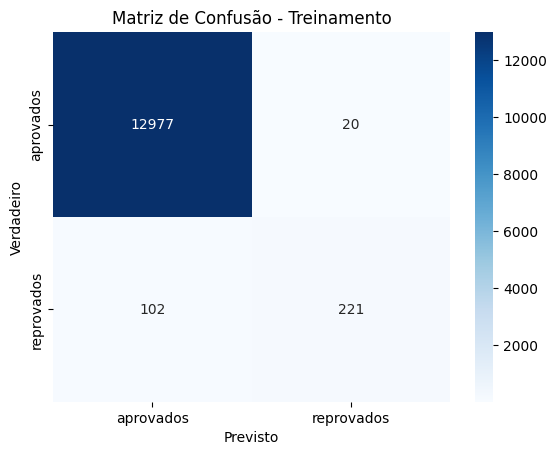

In [29]:
df_encoded = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

features = df_encoded.drop('mau', axis=1)
target = df_encoded['mau']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

modelo_arvore = DecisionTreeClassifier()

modelo_arvore.fit(X_train, y_train)

previsoes = modelo_arvore.predict(X_train)

acuracia_treino = accuracy_score(y_train, previsoes)
print("Acurácia na base de treinamento:", acuracia_treino)

matriz_confusao = confusion_matrix(y_train, previsoes)
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["aprovados", "reprovados"], yticklabels=["aprovados", "reprovados"])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Treinamento')
plt.show()

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

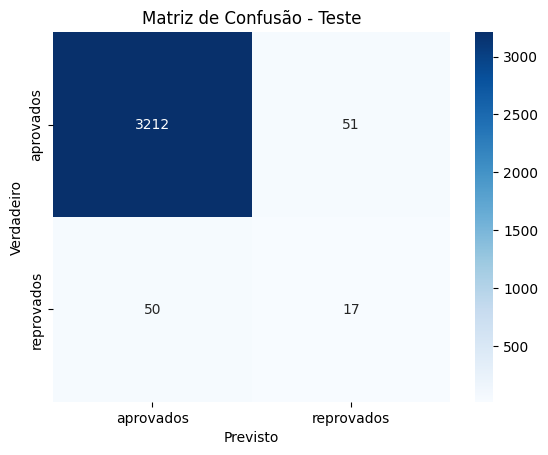

Acurácia na base de teste: 0.9696696696696697
Acurácia na base de treinamento: 0.9908408408408408


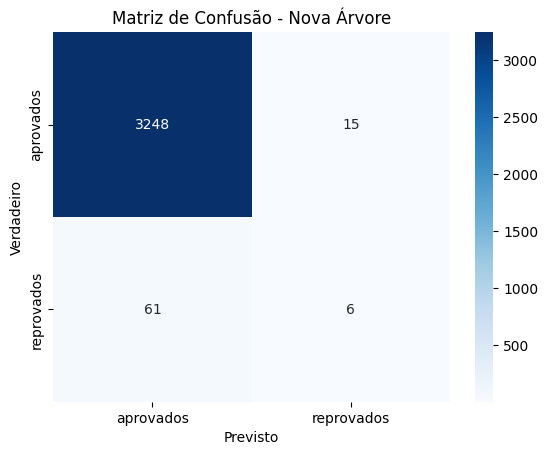

Proporção de proponentes classificados como 'maus': 0.006306306306306306
Acurácia se classificássemos todos os contratos como 'bons': 0.0


In [31]:
previsoes_teste = modelo_arvore.predict(X_test)

matriz_confusao_teste = confusion_matrix(y_test, previsoes_teste)
sns.heatmap(matriz_confusao_teste, annot=True, fmt="d", cmap="Blues", xticklabels=["aprovados", "reprovados"], yticklabels=["aprovados", "reprovados"])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Teste')
plt.show()

acuracia_teste = accuracy_score(y_test, previsoes_teste)
print("Acurácia na base de teste:", acuracia_teste)
print("Acurácia na base de treinamento:", acuracia_treino)

nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
nova_arvore.fit(X_train, y_train)

previsoes_nova_arvore = nova_arvore.predict(X_test)
matriz_confusao_nova_arvore = confusion_matrix(y_test, previsoes_nova_arvore)
sns.heatmap(matriz_confusao_nova_arvore, annot=True, fmt="d", cmap="Blues", xticklabels=["aprovados", "reprovados"], yticklabels=["aprovados", "reprovados"])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Nova Árvore')
plt.show()

proporcao_maus = sum(previsoes_nova_arvore) / len(previsoes_nova_arvore)
print("Proporção de proponentes classificados como 'maus':", proporcao_maus)

acuracia_todos_bons = accuracy_score(y_test, ['bons'] * len(y_test))
print("Acurácia se classificássemos todos os contratos como 'bons':", acuracia_todos_bons)
